First, we imported all necessary libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

Next, we read in the housing data

In [2]:
kcdf = pd.read_csv("../../../data/kc_house_data.csv")
kcdf

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


We used .info() to get a list of column names that we can easily reference

In [3]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We learned how many null values are present and which columns they are in

In [4]:
kcdf.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We found out what the correlation is between each of the feature variables and price, then sorted the correlations from lowest to highest value

In [5]:
corr = kcdf.corr()
corr["price"].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.129599
floors           0.256804
waterfront       0.276295
lat              0.306692
bedrooms         0.308787
view             0.395734
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

We decided to drop the columns that do not have a notable correlation with price. Below, we redefine the dataframe to only include the columns we want to keep.

In [6]:
new_df = kcdf[['id', 'price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'bedrooms', 'waterfront', 'floors']]
new_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors
0,7129300520,221900.0,1180,7,1180,1340,1.00,0.0,3,NaN,1.0
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0
21595,291310100,400000.0,1600,8,1600,1410,2.50,0.0,3,NaN,2.0


We used .sort_values, setting the ascending paramater to False, to find the highest value in the grade column

In [7]:
new_df["grade"].sort_values(ascending = False)

4407     13
7028     13
10362    13
13398    13
9245     13
         ..
8610      4
5199      4
8588      4
1065      4
3220      3
Name: grade, Length: 21597, dtype: int64

We examined price

In [8]:
kcdf['price'].sort_values(ascending = False)

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
           ...    
2139       82500.0
8267       82000.0
16184      81000.0
465        80000.0
15279      78000.0
Name: price, Length: 21597, dtype: float64

We made sure all nulls were dropped from the dataframe

In [9]:
new_df = new_df.dropna()

In [10]:
new_df.isna().sum()

id               0
price            0
sqft_living      0
grade            0
sqft_above       0
sqft_living15    0
bathrooms        0
view             0
bedrooms         0
waterfront       0
floors           0
dtype: int64

We wanted to learn which values were present in the view column, to better understand what the view column represents

In [11]:
new_df.view.value_counts()

0.0    17312
2.0      836
3.0      435
1.0      291
4.0      290
Name: view, dtype: int64

In [12]:
#first I think we have to make a new column for basement

By subtracting squarefeet above ground from squarefeet of each house in general, we created a new column that would tell us the sqaure footage of the basement of each house.

In [13]:
new_df = new_df.assign(sqft_basement = new_df['sqft_living'] - new_df['sqft_above'])
new_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors,sqft_basement
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0,400
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0,0
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0,910
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0,0
5,7237550310,1230000.0,5420,11,3890,4760,4.50,0.0,4,0.0,1.0,1530
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,8,1180,1330,2.50,0.0,3,0.0,2.0,130
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0,0
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0,0
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0,0


However, we were more interested in determining whether or not each house had a basement at all. To figure this out, we turned each basement squarefootage into a boolean value and then created a new column out of these values. True means a house has a basement and False means a house has no basement.

In [14]:
basement = []
for value in new_df["sqft_basement"]:
    if value == 0:
        basement.append("False")
    else:
        basement.append("True")

new_df["basement_bool"] = basement

new_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors,sqft_basement,basement_bool
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0,400,True
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0,0,False
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0,910,True
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0,0,False
5,7237550310,1230000.0,5420,11,3890,4760,4.50,0.0,4,0.0,1.0,1530,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,8,1180,1330,2.50,0.0,3,0.0,2.0,130,True
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0,0,False
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0,0,False
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0,0,False


Because the relationship between a house having or not having a basement and house price is easier to understand than the relationship between basement squarefootage and house price, we deleted the old column sqft_basement

In [15]:
del new_df['sqft_basement']

new_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors,basement_bool
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0,True
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0,False
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0,True
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0,False
5,7237550310,1230000.0,5420,11,3890,4760,4.50,0.0,4,0.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,8,1180,1330,2.50,0.0,3,0.0,2.0,True
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0,False
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0,False
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0,False


Boolean values cannot be included in a heatmap, so we dropped the basement column for our heatmap

In [16]:
no_bool_df = new_df.drop('basement_bool', axis='columns')
no_bool_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0
5,7237550310,1230000.0,5420,11,3890,4760,4.50,0.0,4,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,8,1180,1330,2.50,0.0,3,0.0,2.0
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0


Then, we made the heatmap

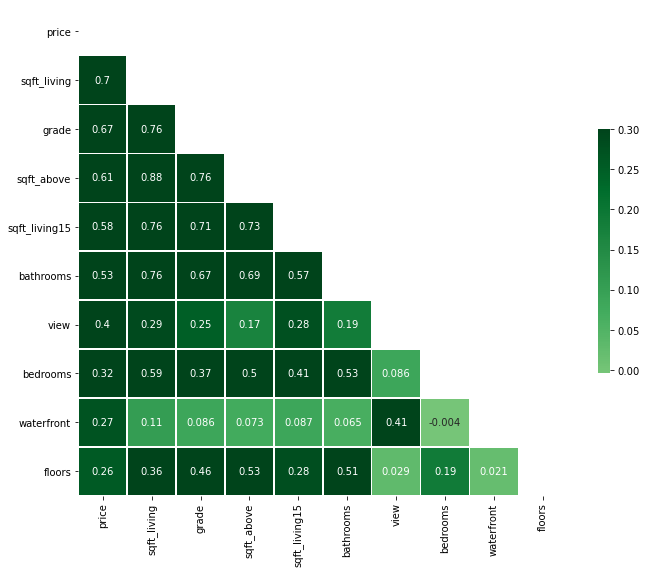

In [60]:
heatmap_df = no_bool_df.drop(columns='id')
heatmap_df = heatmap_df.dropna()
heatmap_df = heatmap_df.drop(labels=15856, axis=0)
heatmap_df.corr()
mask = np.triu(np.ones_like(heatmap_df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = "Greens"
sns.heatmap(heatmap_df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig('heatmap.png');

We created a baseline model

In [19]:
kcdf = kcdf.dropna()
kcdf = kcdf.drop(labels=15856, axis=0)
kcdf["date"] = kcdf.date.apply(lambda x: x[-4:])
kcdf = kcdf.replace('?',np.nan)
kcdf = kcdf.dropna()
kcdf = kcdf.drop(labels=3220, axis=0)

In [20]:
reg = LinearRegression()
y = kcdf['price']
X = kcdf[["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view", "grade", "sqft_above", "sqft_living15"]]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [23]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[['view', 'grade']])
transformed_train = encoder.transform(X_train[['view', 'grade']])
transformed_train = pd.DataFrame(transformed_train, columns = encoder.get_feature_names(), index=X_train.index)
X_train_encoded = pd.concat([X_train.drop(['view', 'grade'], axis = 1), transformed_train], axis = 1)
test_condition = encoder.transform(X_test[['view', 'grade']])
test_condition = pd.DataFrame(test_condition, columns=encoder.get_feature_names(), index=X_test.index)
test_condition = pd.concat([X_test.drop(['view', 'grade'], axis = 1), test_condition], axis = 1)

In [24]:
reg.fit(X_train_encoded, y_train)

LinearRegression()

In [25]:
reg.score(X_train_encoded, y_train)

0.6326352716105776

In [26]:
reg.score(test_condition, y_test)

0.6355557598880417

In [27]:
train_preds = reg.predict(X_train_encoded)
test_preds = reg.predict(test_condition)

In [28]:
np.sqrt(mse(y_train, train_preds))

218115.03809626837

In [29]:
mse(y_test, test_preds, squared=False)

247361.0439989118

After getting a good baseline model, we made a series of better models

In [31]:
#separate target and features
reg = LinearRegression()
y2 = kcdf['price']
X2 = kcdf.drop(['id', 'price'], axis =1)

In [32]:
# 75-25 train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=.25, random_state=42)

In [33]:
# Instantiate StandardScaler 
scaler = StandardScaler()

In [34]:
# Scale training and testing data
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

In [35]:
# Fit model on the scaled training data
reg.fit(X_train_scaled2, y_train2)

LinearRegression()

In [36]:
# Make predictions for train and test sets
train_preds2 = reg.predict(X_train_scaled2)
test_preds2 = reg.predict(X_test_scaled2)

In [37]:
print('Training RMSE: {}'.format(np.sqrt(mse(y_train2, train_preds2))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test2, test_preds2))))

Training RMSE: 195889.95277743947
Testing RMSE: 224697.79269061823


We made a visualization of the correlation between price and sqft_living because sqft_living is the variable most strongly correlated with price

In [53]:
heatmap_df.corr()

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors
price,1.000000,0.704428,0.667719,0.609611,0.582450,0.526609,0.395766,0.309057,0.270982,0.258797
sqft_living,0.704428,1.000000,0.763701,0.877669,0.755524,0.755909,0.285976,0.577972,0.107416,0.356938
grade,0.667719,0.763701,1.000000,0.757406,0.713765,0.666475,0.248898,0.359619,0.085644,0.458230
sqft_above,0.609611,0.877669,0.757406,1.000000,0.732868,0.687621,0.168695,0.480400,0.073500,0.525039
sqft_living15,0.582450,0.755524,0.713765,0.732868,1.000000,0.569443,0.276719,0.392586,0.087257,0.280229
bathrooms,0.526609,0.755909,0.666475,0.687621,0.569443,1.000000,0.186980,0.516137,0.064608,0.506058
view,0.395766,0.285976,0.248898,0.168695,0.276719,0.186980,1.000000,0.083542,0.406654,0.029147
bedrooms,0.309057,0.577972,0.359619,0.480400,0.392586,0.516137,0.083542,1.000000,-0.004082,0.181909
waterfront,0.270982,0.107416,0.085644,0.073500,0.087257,0.064608,0.406654,-0.004082,1.000000,0.021399
floors,0.258797,0.356938,0.458230,0.525039,0.280229,0.506058,0.029147,0.181909,0.021399,1.000000


In [47]:
pricelow = heatmap_df["price"].quantile(0.01)
pricehigh  = heatmap_df["price"].quantile(0.99)

pricefiltered = heatmap_df[(heatmap_df["price"] < pricehigh) & (heatmap_df["price"] > pricelow)]

livinglow = pricefiltered["sqft_living"].quantile(0.01)
livinghigh  = pricefiltered["sqft_living"].quantile(0.99)

livingfiltered = pricefiltered[(pricefiltered["sqft_living"] < livinghigh) & (pricefiltered["sqft_living"] > livinglow)]

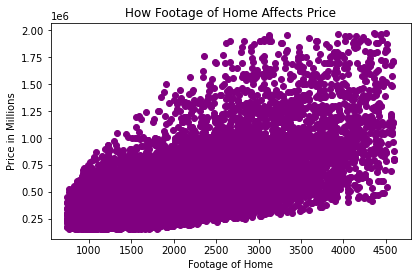

In [48]:
s = livingfiltered["sqft_living"]
p = livingfiltered["price"]
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0,0,1,1])
ax.scatter(s,p, color = "purple")
ax.set_title("How Footage of Home Affects Price")
ax.set_xlabel("Footage of Home")
ax.set_ylabel("Price in Millions")
#plt.tight_layout()
plt.savefig('how_footage_of_home_affects_price.png', bbox_inches='tight');

To understand what increments the numbers on the y axis represent, we found the maxiumum and minimum values for house price

In [54]:
livingfiltered["price"].max()

1980000.0

In [55]:
livingfiltered["price"].min()

156000.0